# Task 1: Exploratory Data Analysis

In [48]:
import os
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# 1) Load dataset
df = pd.read_csv("mushroom.csv")

In [50]:
# Drop index-like column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [51]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [52]:
# 2) Basic info
print("Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (2000, 25)

Column Types:
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

Missing values per column:
cap_shape                

In [53]:
# 3) Statistical Summary
print("\nNumerical Summary:")
print(df.describe())


Numerical Summary:
       stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054


In [54]:
print("\nCategorical Columns Summary:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts().head())


Categorical Columns Summary:

cap_shape - Unique Values: 5
cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64

cap_surface - Unique Values: 4
cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64

cap_color - Unique Values: 9
cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
Name: count, dtype: int64

bruises - Unique Values: 2
bruises
yes    1023
no      977
Name: count, dtype: int64

odor - Unique Values: 9
odor
foul     274
anise    242
musty    239
fishy    228
spicy    226
Name: count, dtype: int64

gill_attachment - Unique Values: 4
gill_attachment
free          540
notched       535
attached      487
descending    438
Name: count, dtype: int64

gill_spacing - Unique Values: 3
gill_spacing
distant    677
close      664
crowded    659
Name: count, dtype: int64

gill_size - Unique Values: 2
gill_size
narrow    1007
broad      993
Name: count, dtype:


Target Class Distribution:
class
poisonous    1400
edible        600
Name: count, dtype: int64


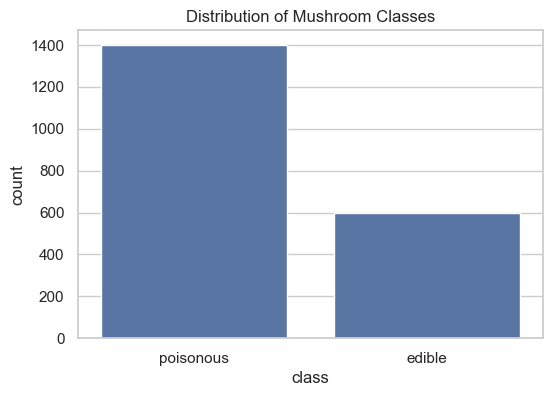

In [55]:
# 4) Target variable distribution
if 'class' in df.columns:
    print("\nTarget Class Distribution:")
    print(df['class'].value_counts())
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='class')
    plt.title("Distribution of Mushroom Classes")
    plt.show()


Numeric Columns: ['stalk_height', 'cap_diameter']


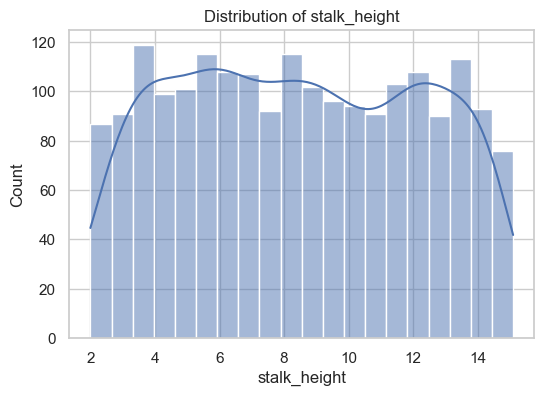

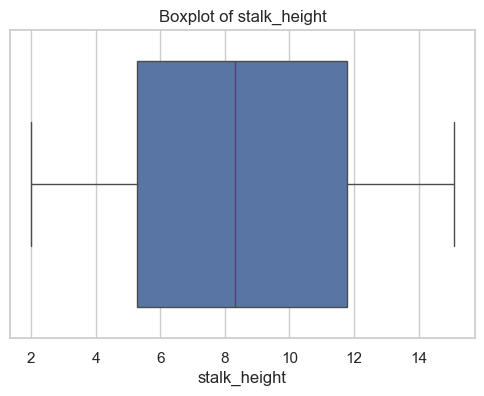

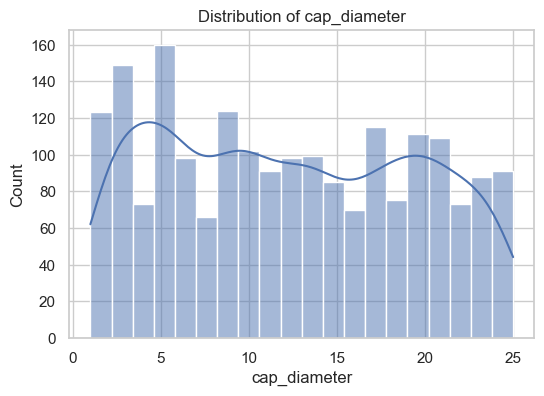

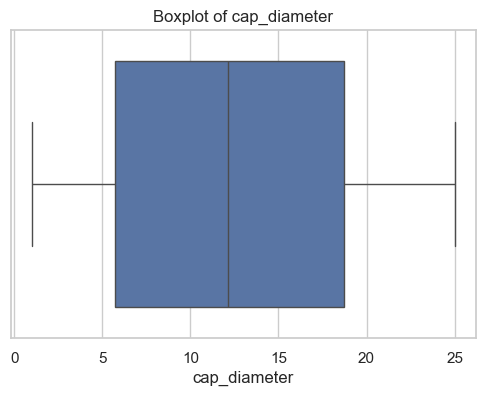

In [56]:
# 5) Numeric Feature Analysis
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric Columns:", num_cols.tolist())

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Correlation Matrix:
              stalk_height  cap_diameter
stalk_height      1.000000     -0.003486
cap_diameter     -0.003486      1.000000


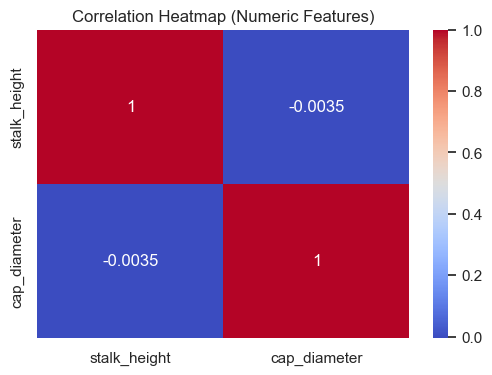

In [57]:
# 6) Correlation Heatmap
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    print("\nCorrelation Matrix:")
    print(corr)
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()

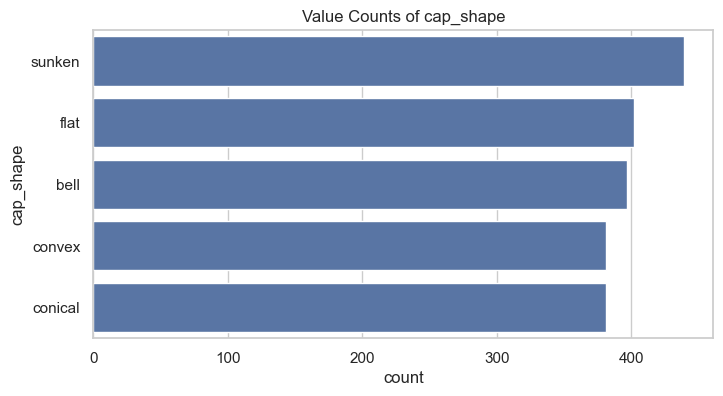

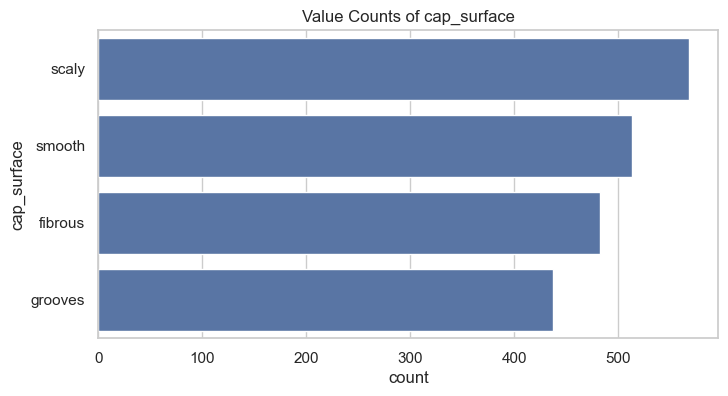

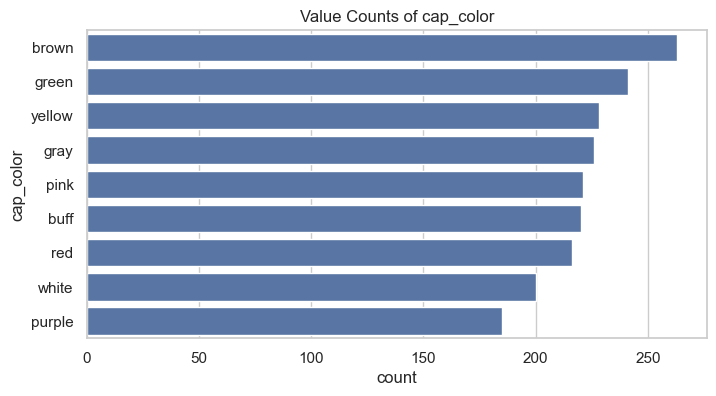

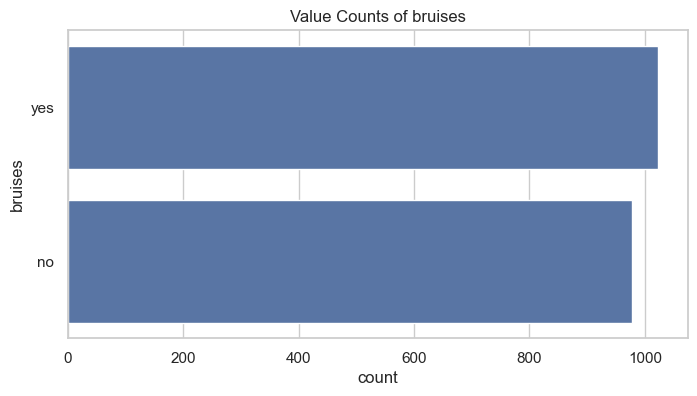

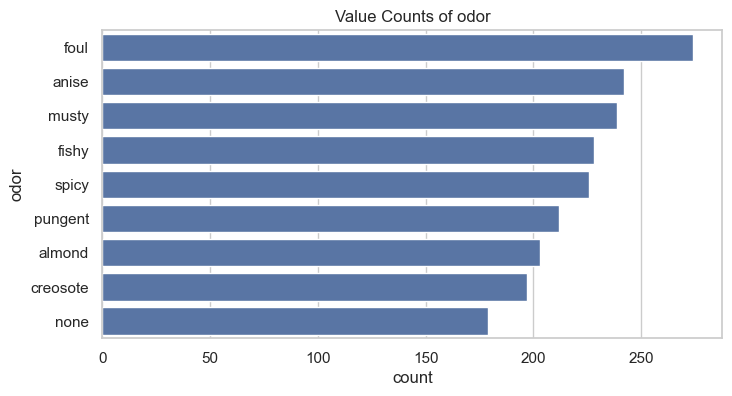

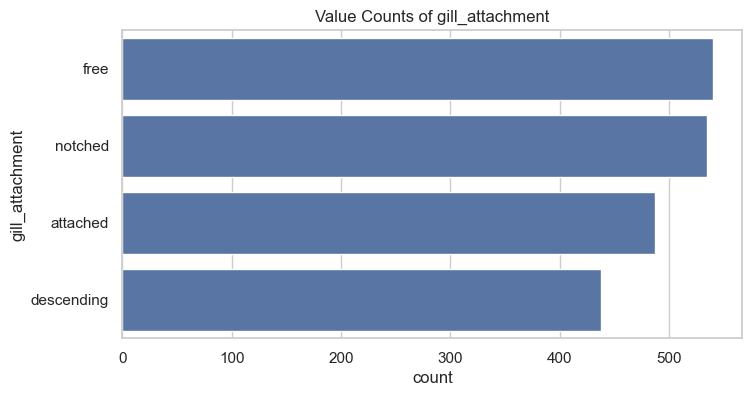

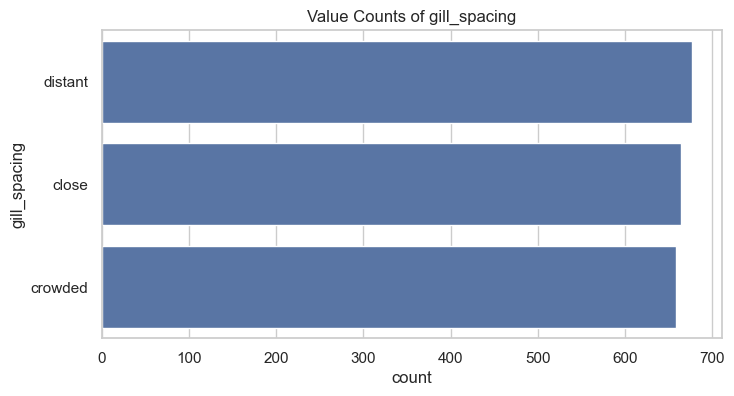

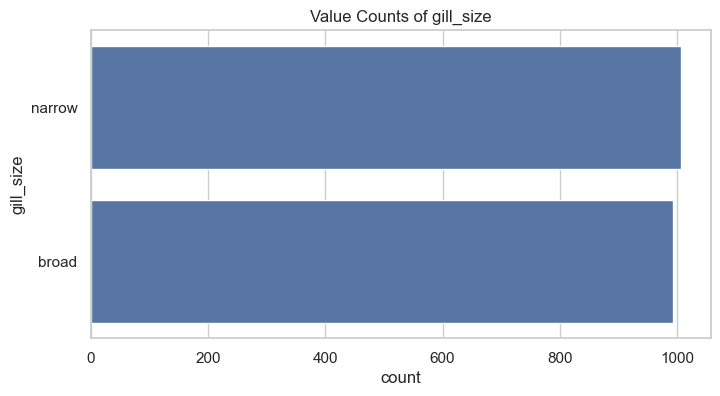

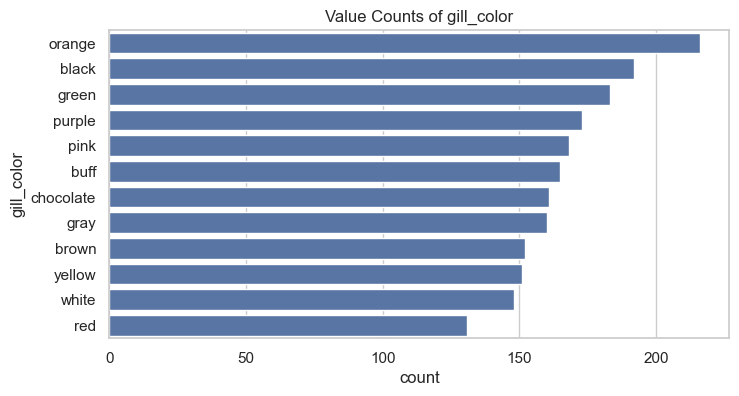

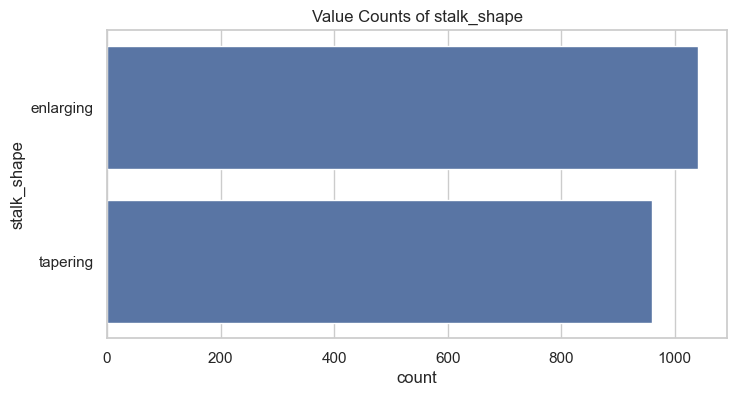

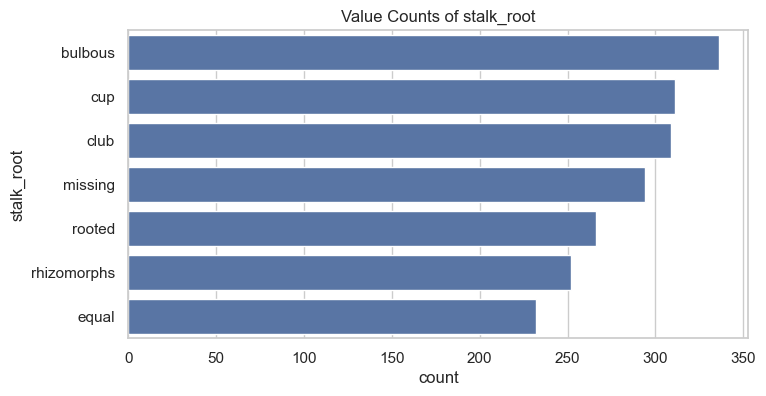

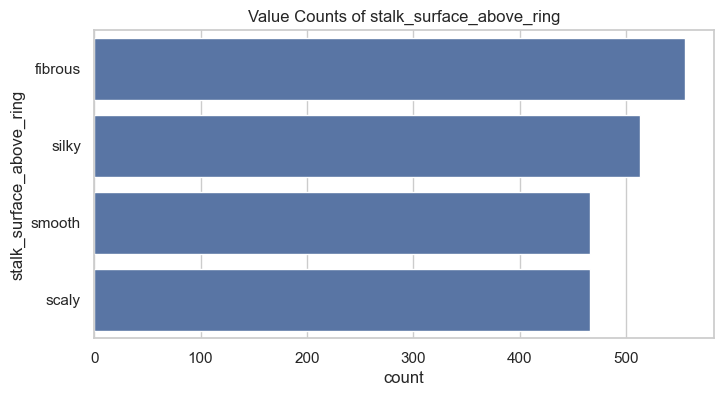

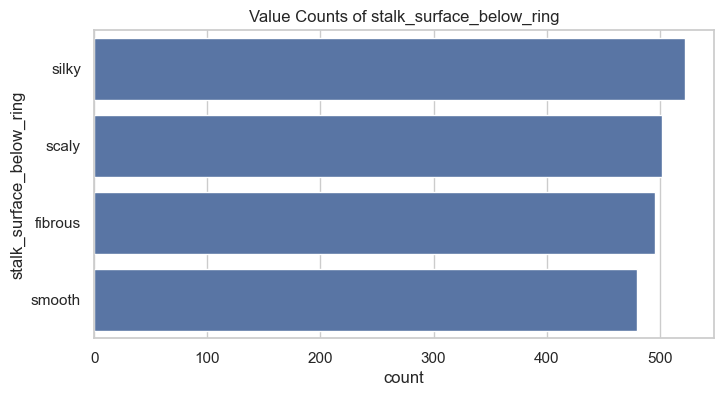

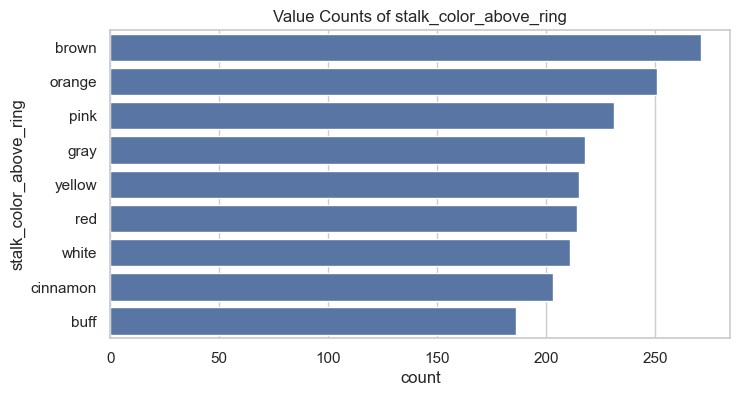

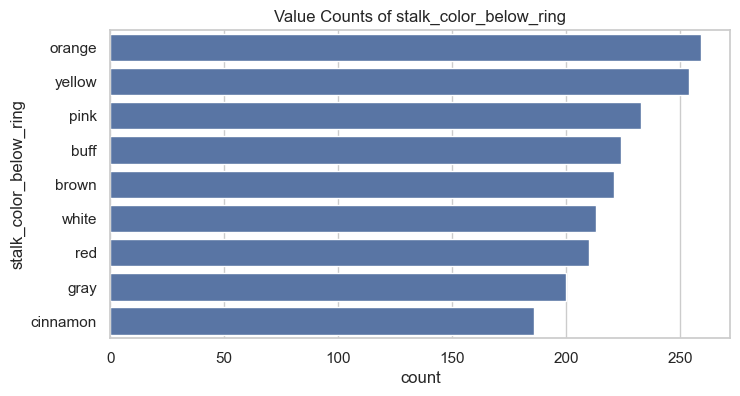

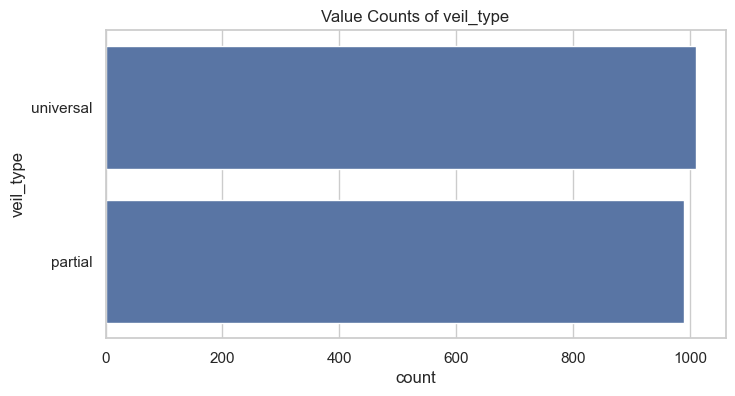

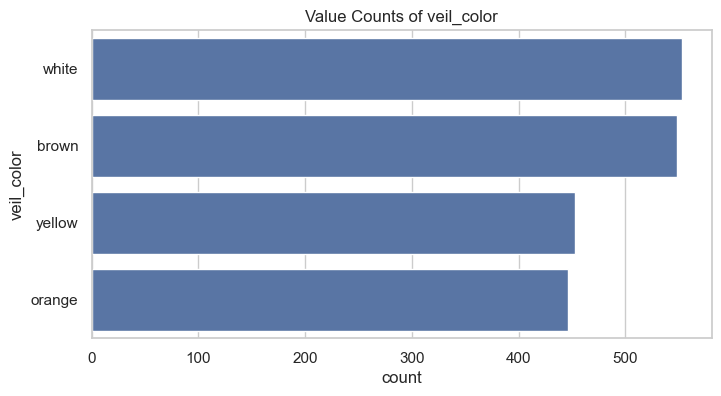

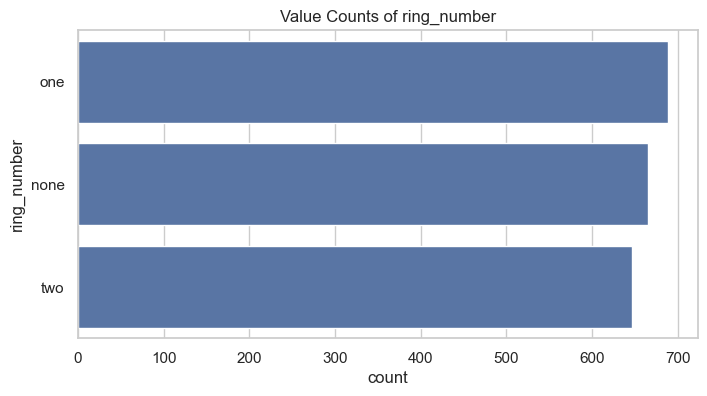

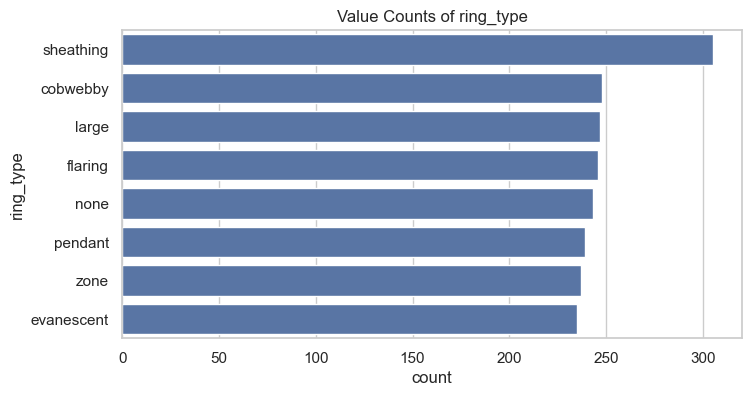

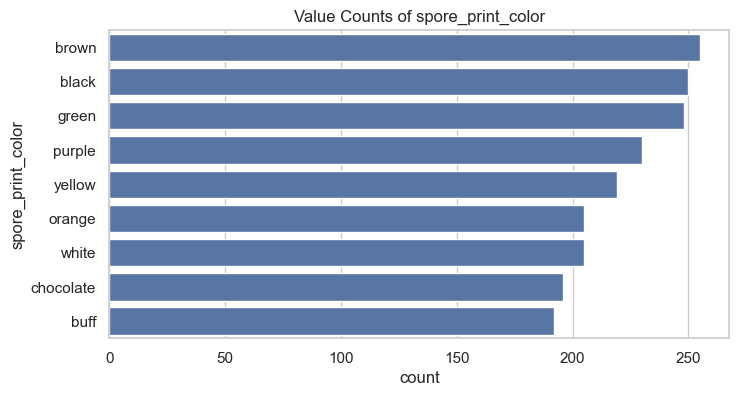

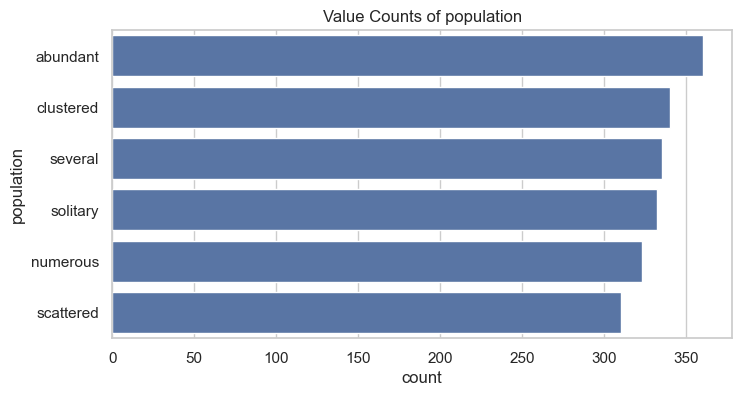

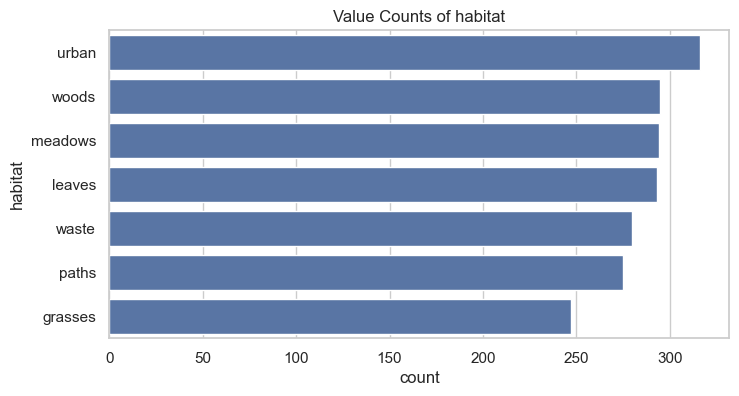

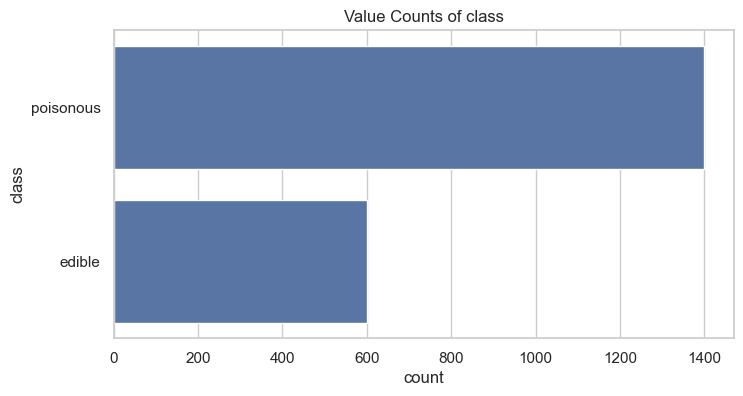

In [58]:
# 7) Categorical Feature Distribution
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Value Counts of {col}")
    plt.show()

# Task 2: Data Preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
# 1) Encode categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

In [61]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(" All categorical columns encoded successfully.")


 All categorical columns encoded successfully.


In [62]:
# 2) Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(" Numerical features scaled using StandardScaler.")

 Numerical features scaled using StandardScaler.


In [63]:
# 3) Split into features and target
X = df.drop(columns=["class"])
y = df["class"]

In [64]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [65]:
# 4) Display dataset details
print("\n✅ Data Preprocessing Completed Successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Scaled features: {list(numerical_cols)}")
print(f"Encoded categorical features: {list(categorical_cols)}")


✅ Data Preprocessing Completed Successfully!
Training set shape: (1600, 24)
Testing set shape: (400, 24)
Scaled features: ['stalk_height', 'cap_diameter']
Encoded categorical features: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class']


# Task 3: Data Visualization

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Ensure plots appear in notebook
plt.rcParams["figure.figsize"] = (7, 5)
sns.set(style="whitegrid")

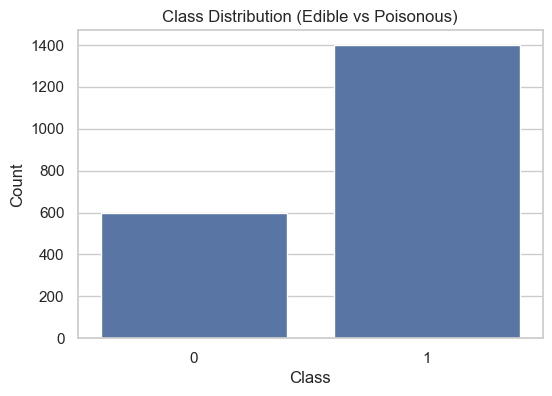

In [68]:
# 1) Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

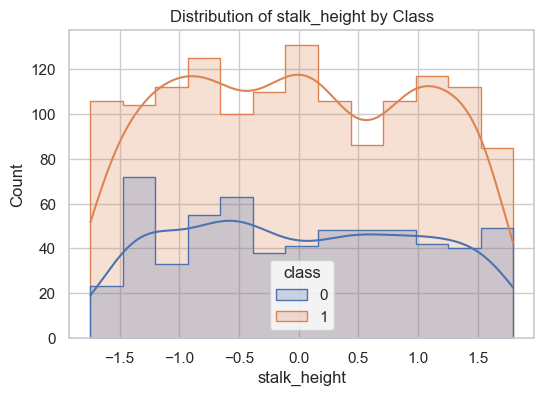

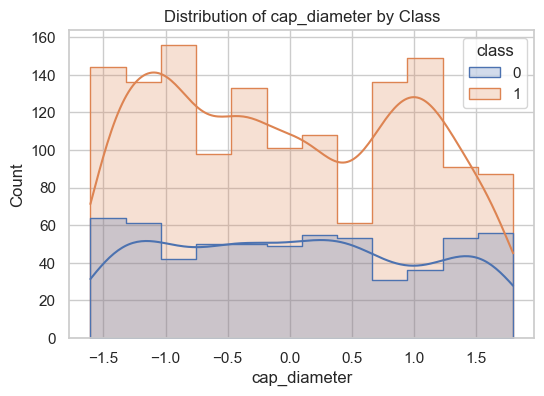

In [69]:
# 2) Distribution of numerical features by class
num_cols = ["stalk_height", "cap_diameter"]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step")
    plt.title(f"Distribution of {col} by Class")
    plt.show()

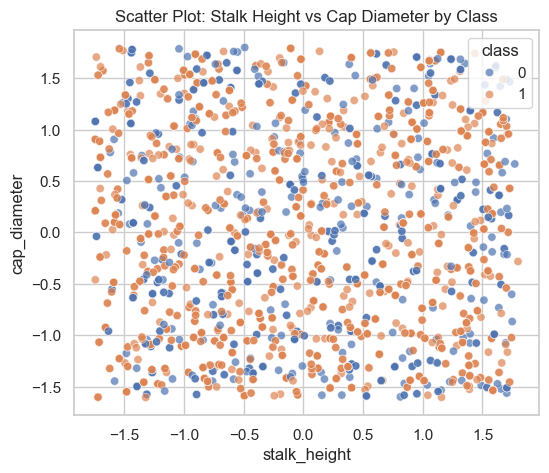

In [70]:
# 3) Scatter plot between numerical features
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="stalk_height", y="cap_diameter", hue="class", alpha=0.7)
plt.title("Scatter Plot: Stalk Height vs Cap Diameter by Class")
plt.show()


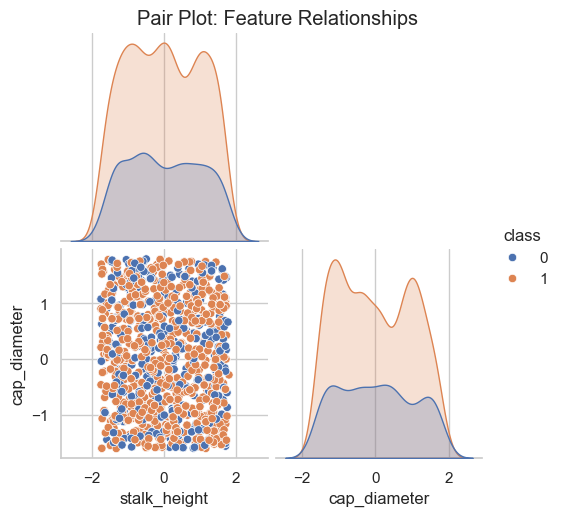

In [71]:
# 4) Pair plot to explore relationships
sns.pairplot(df, vars=num_cols, hue="class", corner=True)
plt.suptitle("Pair Plot: Feature Relationships", y=1.02)
plt.show()

# Task 4: SVM Implementation

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [73]:
# 1) Initialize SVM model
# Using RBF kernel (default), good for nonlinear relationships
svm_model = SVC(kernel='rbf', random_state=42)

In [74]:
# 2) Train the model
svm_model.fit(X_train, y_train)
print("✅ SVM model trained successfully.")

✅ SVM model trained successfully.


In [75]:
# 3) Evaluate the model
y_pred = svm_model.predict(X_test)

In [76]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [77]:
# Display metrics
print("\n✅ Model Evaluation Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


✅ Model Evaluation Results:
Accuracy:  0.7100
Precision: 0.7457
Recall:    0.7100
F1-Score:  0.6033


In [78]:
# 4) Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.04      0.08       120
           1       0.71      1.00      0.83       280

    accuracy                           0.71       400
   macro avg       0.77      0.52      0.45       400
weighted avg       0.75      0.71      0.60       400



In [79]:
# 5) Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  5 115]
 [  1 279]]


# Task 5: Visualization

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
# 1. Predict on test data
y_pred = svm_model.predict(X_test)  # Use the correct model variable name from previous cells

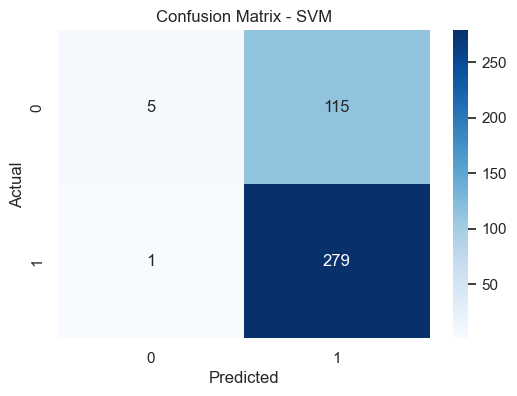

In [82]:
# 2. Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
# 3. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.04      0.08       120
           1       0.71      1.00      0.83       280

    accuracy                           0.71       400
   macro avg       0.77      0.52      0.45       400
weighted avg       0.75      0.71      0.60       400



In [87]:
# 4. Decision boundary visualization with two chosen features
feat1, feat2 = 0, 1  # Adjust the indices to two meaningful features
X_train_np = X_train.iloc[:, [feat1, feat2]].values
X_test_np = X_test.iloc[:, [feat1, feat2]].values

svm_vis = SVC(kernel="rbf")
svm_vis.fit(X_train_np, y_train)

x_min, x_max = X_test_np[:, 0].min() - 1, X_test_np[:, 0].max() + 1
y_min, y_max = X_test_np[:, 1].min() - 1, X_test_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


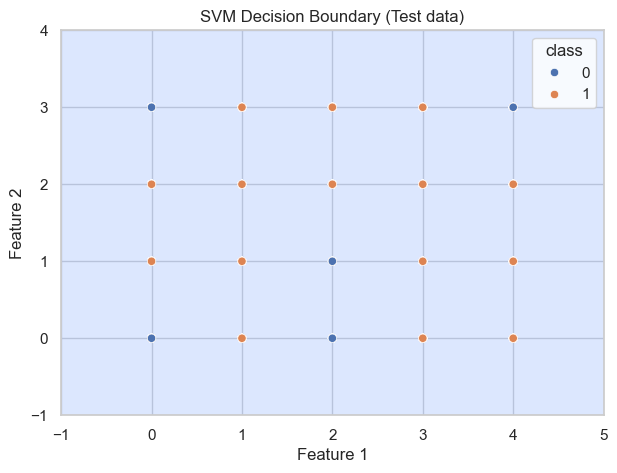

In [88]:
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_test_np[:, 0], y=X_test_np[:, 1], hue=y_test, edgecolor='w')
plt.title('SVM Decision Boundary (Test data)')
plt.xlabel(f'Feature {feat1+1}')
plt.ylabel(f'Feature {feat2+1}')
plt.show()

# Task 6: Parameter Tuning and Optimization

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [90]:
# Define SVM model
svm = SVC()

In [91]:
# Parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types to try
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

In [92]:
# Setup GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [93]:
# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [94]:
# Best hyperparameters found
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [95]:
# Get the best estimator
best_svm = grid_search.best_estimator_

In [96]:
# Evaluate best model on test data
test_accuracy = best_svm.score(X_test, y_test)
print(f"\nTest Accuracy with Best Parameters: {test_accuracy:.4f}")


Test Accuracy with Best Parameters: 0.8625


# Task 7: Comparison and Analysis

In [97]:
from sklearn.svm import SVC

In [98]:
kernels = ['linear', 'poly', 'rbf']
results = {}

In [99]:
for kernel in kernels:
    clf = SVC(kernel=kernel, C=grid_search.best_params_['C'], gamma=grid_search.best_params_.get('gamma', 'scale'))
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Test Accuracy: {acc:.4f}")

Kernel: linear, Test Accuracy: 0.7000
Kernel: poly, Test Accuracy: 0.8350
Kernel: rbf, Test Accuracy: 0.8625


In [101]:
print("""
Strengths:

SVM with the RBF kernel gives the best accuracy (0.8625), showing it handles non-linear boundaries present in the mushroom data very well.

Good performance (over 80%) with the polynomial kernel also shows SVM's effectiveness with feature interactions.

SVM is robust to outliers and can handle high-dimensional, encoded categorical mushroom features after preprocessing.
""")


Strengths:

SVM with the RBF kernel gives the best accuracy (0.8625), showing it handles non-linear boundaries present in the mushroom data very well.

Good performance (over 80%) with the polynomial kernel also shows SVM's effectiveness with feature interactions.

SVM is robust to outliers and can handle high-dimensional, encoded categorical mushroom features after preprocessing.



In [102]:
print("""
Weaknesses:

The linear kernel underperforms (0.7000), indicating the data is not linearly separable, which is a known SVM limitation.

Training time and resource demands grow with more samples and features, making SVM less efficient for much larger datasets.

Performance is sensitive to feature scaling, which is critical as shown by the results after normalization.
""")


Weaknesses:

The linear kernel underperforms (0.7000), indicating the data is not linearly separable, which is a known SVM limitation.

Training time and resource demands grow with more samples and features, making SVM less efficient for much larger datasets.

Performance is sensitive to feature scaling, which is critical as shown by the results after normalization.



In [103]:
print("""
Practical Implications of SVM in Real-World Classification Tasks

SVMs are reliable for clear classification boundaries and moderate-size datasets, like mushroom toxicity prediction.

Kernel tricks (e.g., RBF) allow non-linear separation, vital for complex biological or chemical data.

Require careful preprocessing (encoding and scaling), and hyperparameter tuning for best performance.

Less interpretable than tree-based methods, but offer strong generalization when tuned.
""")


Practical Implications of SVM in Real-World Classification Tasks

SVMs are reliable for clear classification boundaries and moderate-size datasets, like mushroom toxicity prediction.

Kernel tricks (e.g., RBF) allow non-linear separation, vital for complex biological or chemical data.

Require careful preprocessing (encoding and scaling), and hyperparameter tuning for best performance.

Less interpretable than tree-based methods, but offer strong generalization when tuned.

